In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import hddm 
from patsy import dmatrix 
import numpy as np
# print(hddm.__version__)

%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 10

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
!pwd

/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis


In [3]:
all_data = hddm.load_csv('aggregated_data/cleaned_probC_data_test.csv')

In [4]:
all_data.head(10)

,Unnamed: 0,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,0,1.0,1.0,1.0,1.0,600.0,0.525745,2.060731,0.545611,0.0,0.0,112.0,770,hc
1,1,0.0,0.0,1.0,0.0,599.0,0.296897,1.812463,0.524884,0.0,1.0,111.0,770,hc
2,2,1.0,0.0,0.0,0.0,598.0,0.210249,1.496023,0.304553,0.0,0.0,111.0,770,hc
3,3,1.0,1.0,1.0,3.0,600.0,0.276397,1.937237,0.675080,0.0,1.0,112.0,770,hc
4,4,0.0,1.0,0.0,3.0,602.0,0.287072,1.813193,0.538249,0.0,0.0,112.0,770,hc
5,5,1.0,1.0,1.0,2.0,603.0,0.248452,1.718456,0.473522,0.0,0.0,112.0,770,hc
6,6,0.0,0.0,1.0,0.0,602.0,0.262831,1.628087,0.368475,0.0,1.0,111.0,770,hc
7,7,1.0,0.0,0.0,0.0,601.0,0.252580,1.875058,0.626696,0.0,0.0,111.0,770,hc
8,8,0.0,0.0,1.0,0.0,600.0,0.206990,1.823410,0.633504,0.0,0.0,111.0,770,hc
9,9,1.0,0.0,0.0,0.0,599.0,0.441743,1.985938,0.553008,0.0,0.0,111.0,770,hc


In [5]:
data = all_data[['accuracy', 'rt', 'condition', 'ID']] 
data = data.rename(index=str, columns={"accuracy": "response", "ID": "subj_idx", "condition": "stim"})

In [6]:
data.columns = data.columns.str.strip()
data['stim'] = data['stim'].str.strip()
data.head()

,response,rt,stim,subj_idx
0,1.0,0.525745,hc,770
1,0.0,0.296897,hc,770
2,0.0,0.210249,hc,770
3,1.0,0.276397,hc,770
4,1.0,0.287072,hc,770


In [7]:
data = hddm.utils.flip_errors(data)

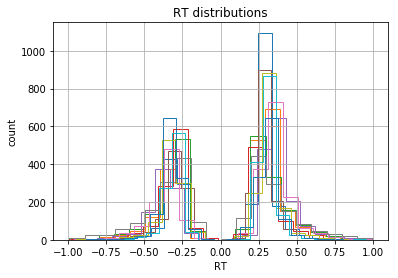

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [9]:
np.unique(data.subj_idx), np.unique(data.stim)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

## Within-subjects regression 

#### Treatment specifies intercept (comparison condition) 
#### C(x) specifies categorical predictor 

##### (design matrix will auto-code dummy variables)

#### trialwise response ~ categorical predictor, intercept condition 

In [10]:
formula="0+C(stim)"
d_mat = dmatrix(formula, data)
print(d_mat.design_info.column_names)
print(d_mat)
sum(d_mat)

['C(stim)[hc]', 'C(stim)[hv]', 'C(stim)[lc]', 'C(stim)[lv]']
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]]


array([ 6600.,  6600.,  6600.,  6600.])

In [11]:
d_mat

DesignMatrix with shape (26400, 4)
  C(stim)[hc]  C(stim)[hv]  C(stim)[lc]  C(stim)[lv]
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
            1            0            0            0
           

In [12]:
v_reg_model = "v ~"+ formula
a_reg_model = "a ~"+ formula
av_reg_model = [v_reg_model, a_reg_model]

In [13]:
v_within_subj = hddm.HDDMRegressor(data, v_reg_model)
v_within_subj.sample(5000,burn=200,dbname='v_traces.db', db='pickle')

Adding these covariates:
['v_C(stim)[hc]', 'v_C(stim)[hv]', 'v_C(stim)[lc]', 'v_C(stim)[lv]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 8045.3 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [14]:
a_within_subj = hddm.HDDMRegressor(data, a_reg_model)
a_within_subj.sample(5000,burn=200,dbname='a_traces.db', db='pickle')

Adding these covariates:
['a_C(stim)[hc]', 'a_C(stim)[hv]', 'a_C(stim)[lc]', 'a_C(stim)[lv]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 4931.8 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [15]:
av_within_subj = hddm.HDDMRegressor(data, av_reg_model)
av_within_subj.sample(5000,burn=200,dbname='av_traces.db', db='pickle')

Adding these covariates:
['v_C(stim)[hc]', 'v_C(stim)[hv]', 'v_C(stim)[lc]', 'v_C(stim)[lv]']
Adding these covariates:
['a_C(stim)[hc]', 'a_C(stim)[hv]', 'a_C(stim)[lc]', 'a_C(stim)[lv]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 13407.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


#### save models

In [16]:
v_within_subj.save('v_within_subj_observed')
a_within_subj.save('a_within_subj_observed')
av_within_subj.save('av_within_subj_observed')

#### extract DIC score

In [17]:
v_within_subj.dic, a_within_subj.dic, av_within_subj.dic

(-2641.995193179328, -2454.1557611969488, -2943.9427782038056)

#### plot within-subjects effects for winning model

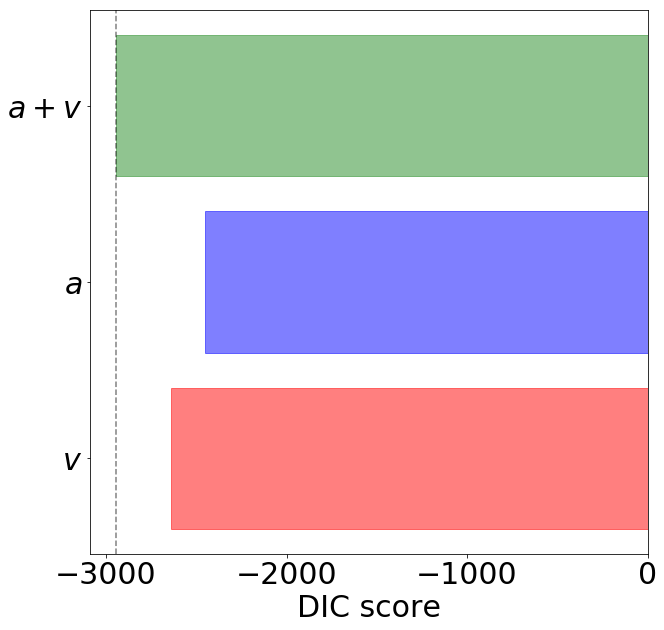

In [18]:
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$v$',r'$a$',r'$a+v$']
dics = [v_within_subj.dic,  a_within_subj.dic, av_within_subj.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(av_within_subj.dic, color='k', alpha=0.5, linestyle = '--')

In [ ]:
v_hc, v_hv, v_lc, v_lv = av_within_subj.nodes_db.ix[['v_C(stim)[hc]', 'v_C(stim)[hv]', 'v_C(stim)[lc]', 'v_C(stim)[lv]'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

In [21]:
a_hc, a_hv, a_lc, a_lv  = a_within_subj.nodes_db.ix[['a_C(stim)[hc]', 'a_C(stim)[hv]', 'a_C(stim)[lc]', 'a_C(stim)[lv]'], 'node']
bound_fig = hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
plt.xlabel('bound')
plt.ylabel('Posterior probability')
plt.title('All Groups: Group mean posteriors of within-subject bound effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

SyntaxError: invalid syntax (<ipython-input-21-aecc066b50a0>, line 8)

#### Hypothesized contrasts

In [ ]:
hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('bound')
plt.ylabel('Posterior probability')
plt.title('Volatility: Group mean posteriors of within-subject bound effects.')

In [ ]:
hddm.analyze.plot_posterior_nodes([av_hc, av_lc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Conflict: Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

#### extract DIC score

#### all stats

In [ ]:
# v_within_subj.print_stats()